In [55]:
%matplotlib inline
import pandas as pd
from subprocess import call
import os

client_id = "dqn11"

logs_dir = "../" + client_id + "/logs"
config_dir = "../" + client_id + "/config"
ret = call(["aws", "s3", "sync", "s3://" + client_id + "/logs", logs_dir])
ret = call(["aws", "s3", "sync", "s3://" + client_id + "/config", config_dir])


if ret != 0:
    print("Problem ", ret)
else:
    print("Downloaded!")

Downloaded!


In [56]:
import os
import pandas as pd
paths = [logs_dir + "/" + file_name for file_name in sorted(os.listdir(logs_dir)) if file_name.endswith(".s")]


log=None
log = pd.Series()
for path in paths:
    log = pd.concat([u, pd.read_csv(path, sep='|', header=None, engine='python')])
print(len(log))
log = log.iloc[:,0]

102858


In [57]:

rewards = log[log.str.contains("Game reward: ")].str.extract('Game reward: (\d*)').astype(float)
rewards.index = range(0,len(rewards.index))
loss = log[log.str.contains("loss:")].str.extract('loss:  (\d+\.\d+)').astype(float)
loss.index = range(0, len(loss.index))
epsilon = log[log.str.contains('epsilon:')].str.extract('epsilon:  (\d+\.\d+)').astype(float)
epsilon.index = range(0, len(epsilon.index))

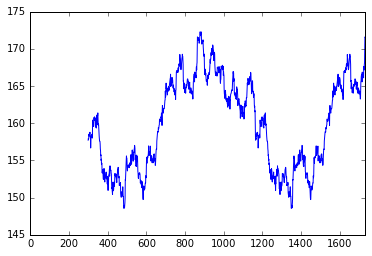

In [58]:
pd.rolling_mean(rewards, 300).plot()

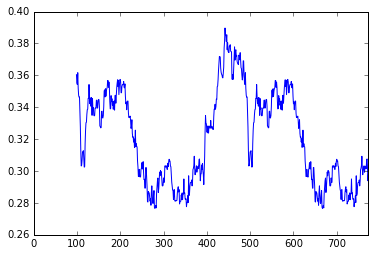

In [59]:
pd.rolling_mean(loss, 100).plot()

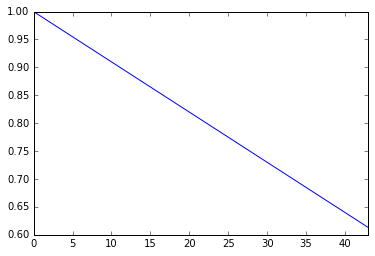

In [54]:
epsilon.plot()

In [114]:
ret = call(["./fetch_weights.sh"])
if ret != 0:
    print("Problem ", ret)